In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv("CompleteDataset.csv",index_col = 0)


In [9]:
L = [7] + list(range(13,47))
df_matrix = df.iloc[ :, L]


In [10]:
df_matrix.apply(pd.to_numeric, errors='coerce')
def convert_to_float(x):
    if len(x.split('+')) > 1:
        return float(x.split('+')[0])
    if len(x.split('-')) > 1:
        return float(x.split('-')[0])
    else:
        return float(x)

a = [ 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']

for p in a:
    df_matrix[p] = list(map(convert_to_float, df_matrix[p]))

/Users/niharikareddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


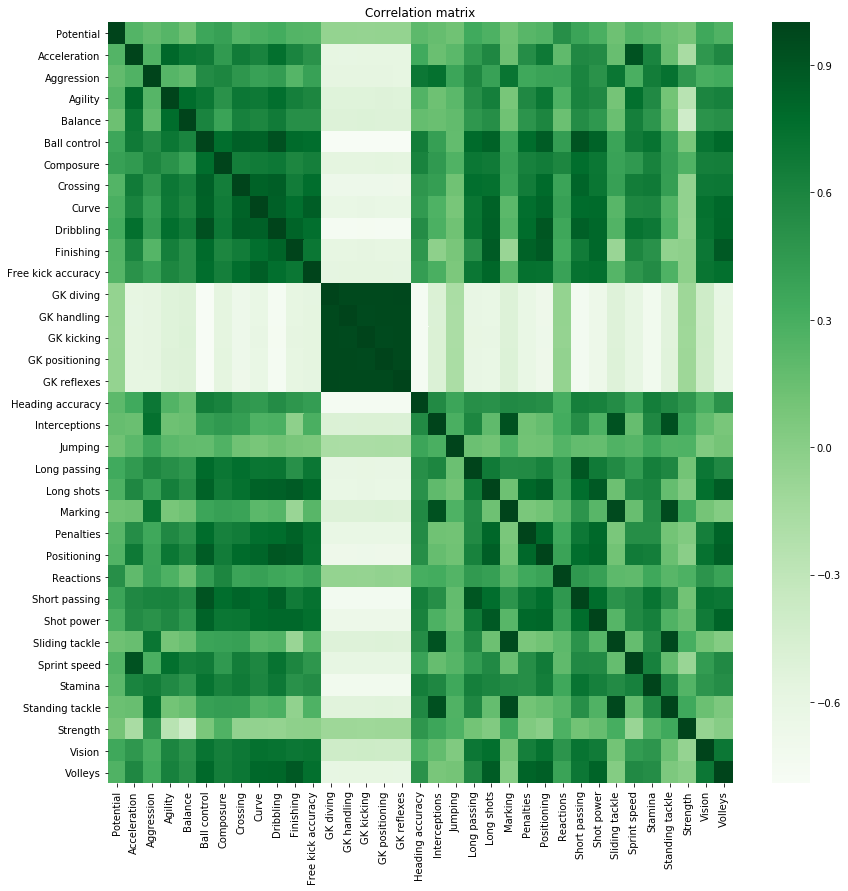

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(14,14)
ax = sns.heatmap(df_matrix.corr(),cmap = "Greens").set_title('Correlation matrix')

In [22]:
top10 = list(df['Nationality'].value_counts().head(10).index)

In [23]:
d = df.query('Nationality in @top10')

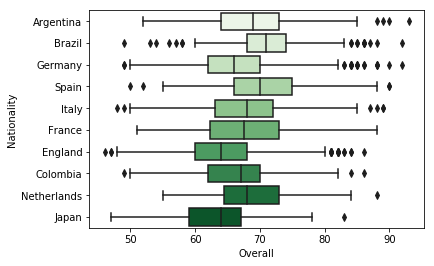

In [53]:
box_overall = sns.boxplot(data = d, y = 'Nationality', x = 'Overall',palette = 'Greens')

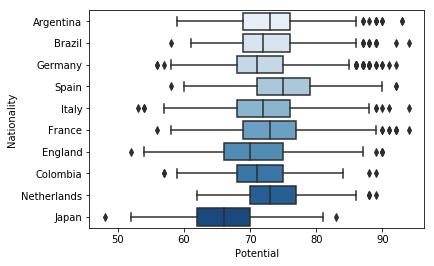

In [54]:
box_potential = sns.boxplot(data = d, y = 'Nationality', x = 'Potential', palette = 'Blues')

In [26]:
player = pd.read_csv('PlayerPersonalData.csv', index_col = 0)

In [32]:
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    

player['ValueNum'] = player['Value'].apply(lambda x: str2number(x))
player['WageNum'] = player['Wage'].apply(lambda x: str2number(x))

In [33]:
clubs = ['FC Barcelona', 'Real Madrid CF', 'Paris Saint-Germain', 'FC Bayern Munich', 'Manchester United', 'Chelsea', 'Juventus', 'Arsenal', 'Manchester City', 'Milan']

In [34]:
c = player.query('Club in @clubs')

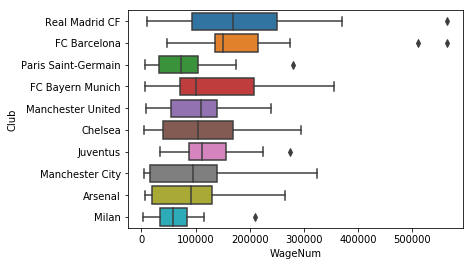

In [47]:
box_wage = sns.boxplot(data = c, y = 'Club', x = 'WageNum')

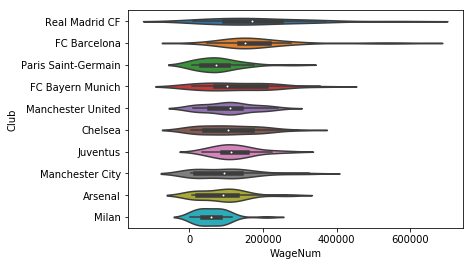

In [48]:
violin_wage = sns.violinplot(data = c, y = 'Club', x = 'WageNum')

In [38]:
overall = pd.DataFrame(df.groupby(["Age"])['Overall'].mean())

In [39]:
potential = pd.DataFrame(df.groupby(["Age"])['Potential'].mean())

In [41]:
merged = pd.merge(overall, potential, on='Age', how='inner')
merged['Age']= merged.index
merged.reset_index(drop = True, inplace = True)

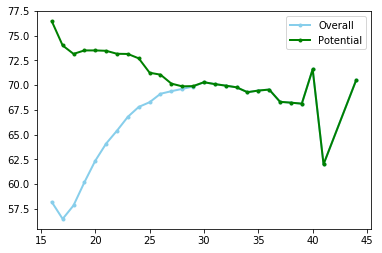

In [42]:
p = plt.plot( 'Age', 'Overall', data=merged, marker='.', color='skyblue', linewidth=2, label ="Overall" )
p = plt.plot( 'Age', 'Potential', data=merged, marker='.', color='green', linewidth=2, label = "Potential")
p = plt.legend()
